#### 14.03.24, &copy; [Marikov Artem](https://github.com/ScarlettTheBrave), 2024

# Лабораторна робота 4. Імовірнісний підхід до машинного навчання. Байєсівський класифікатор

__Мета:__ _закріпити на практиці концепцію байєсівського вивода засобами мови Python._

# Завдання для самостійної роботи
1. Реалізувати наївний байєсівський класифікатор для свого варіанта (І завдання).
2. Реалізувати байєсівський класифікатор, попередньо змоделювавши дані згідно параметри кластерів у відповідності до свого варіанта (ІІ завдання).

# Хід роботи

#### 1. Реалізувати наївний байєсівський класифікатор для свого варіанта.

In [1]:
import numpy as np

x_train_13 = np.array([[37, 12], [48, 48], [31, 13], [27, 28], [32, 38], [41, 42], [8, 20], [13, 27], [17, 32], [19, 12]])
y_train_13 = np.array([-1, 1, -1, -1, 1, -1, 1, -1, 1, 1])

mw1_13, ml1_13 = np.mean(x_train_13[y_train_13 == 1], axis=0)
mw_1_13, ml_1_13 = np.mean(x_train_13[y_train_13 == -1], axis=0)

sw1_13, sl1_13 = np.var(x_train_13[y_train_13 == 1], axis=0)
sw_1_13, sl_1_13 = np.var(x_train_13[y_train_13 == -1], axis=0)

print('Average: ', mw1_13, ml1_13, mw_1_13, ml_1_13)
print('Dispercenton:', sw1_13, sl1_13, sw_1_13, sl_1_13)

x_13 = [40, 10]  # довжина, ширина жука

a_1_13 = lambda x: -(x[0] - ml_1_13) ** 2 / (2 * sl_1_13) - (x[1] - mw_1_13) ** 2 / (2 * sw_1_13)  # Перший класифікатор
a1_13 = lambda x: -(x[0] - ml1_13) ** 2 / (2 * sl1_13) - (x[1] - mw1_13) ** 2 / (2 * sw1_13)  # Другий класифікатор
y_13 = np.argmax([a_1_13(x_13), a1_13(x_13)])  # Обираємо максимум

print('Номер класу (1 - гусениця, -1 - божа корівка): ', y_13)

Average:  24.8 30.0 29.8 24.4
Dispercenton: 193.36 163.2 93.75999999999999 122.64000000000001
Номер класу (1 - гусениця, -1 - божа корівка):  1


#### 2.Реалізувати байєсівський класифікатор, попередньо змоделювавши дані згідно параметри кластерів у відповідності до свого варіанта.

1


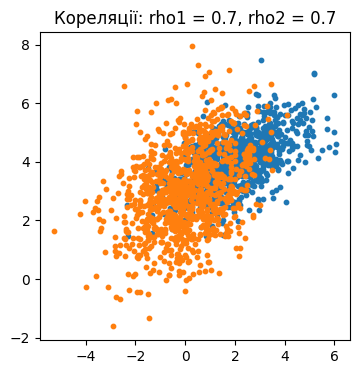

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

# Вхідні параметри для першого кластеру
rho1 = 0.7
sigma_x1_squared = 1.9
mu_x1 = [2, 4]
sigma_y1_squared = 0.8
mu_y1 = [2, 4]

# Вхідні параметри для другого кластеру (за замовчуванням)
rho2 = 0.7
sigma_x2_squared = 2.0
mu_x2 = [0, 3]
sigma_y2_squared = 2.0
mu_y2 = [0, 3]

# моделювання навчальної вибірки для кожного кластеру
N = 1000
x1 = np.random.multivariate_normal(mu_x1, [[sigma_x1_squared, rho1], [rho1, sigma_y1_squared]], N).T
x2 = np.random.multivariate_normal(mu_x2, [[sigma_x2_squared, rho2], [rho2, sigma_y2_squared]], N).T

# обчислення оцінок середнього та коваріаційних матриць для кожного кластеру
mm1 = np.mean(x1.T, axis=0)
mm2 = np.mean(x2.T, axis=0)

a = (x1.T - mm1).T
VV1 = np.array([[np.dot(a[0], a[0]) / N, np.dot(a[0], a[1]) / N],
                [np.dot(a[1], a[0]) / N, np.dot(a[1], a[1]) / N]])

a = (x2.T - mm2).T
VV2 = np.array([[np.dot(a[0], a[0]) / N, np.dot(a[0], a[1]) / N],
                [np.dot(a[1], a[0]) / N, np.dot(a[1], a[1]) / N]])

# модель гауссівського баєсівського класифікатора
Py1, L1 = 0.5, 1  # ймовірності появи класів
Py2, L2 = 1 - Py1, 1  # та величини штрафів невірної класифікації

b = lambda x, v, m, l, py: np.log(l * py) - 0.5 * (x - m) @ np.linalg.inv(v) @ (x - m).T - 0.5 * np.log(
    np.linalg.det(v))

x = np.array([-2, -2])  # вхідний вектор у форматі (x, y)
a = np.argmax([b(x, VV1, mm1, L1, Py1), b(x, VV2, mm2, L2, Py2)])  # класифікатор
print(a)

# виведення графіків
plt.figure(figsize=(4, 4))
plt.title(f"Кореляції: rho1 = {rho1}, rho2 = {rho2}")
plt.scatter(x1[0], x1[1], s=10)
plt.scatter(x2[0], x2[1], s=10)
plt.show()

#### 2.1.Змінити знак коефіцієнта кореляції одного з кластерів. Повторити експеримент з класифікації.

Було змінено rho2 на протилежне число і кореляція кластерів rho2 змінилась зеркально.

1


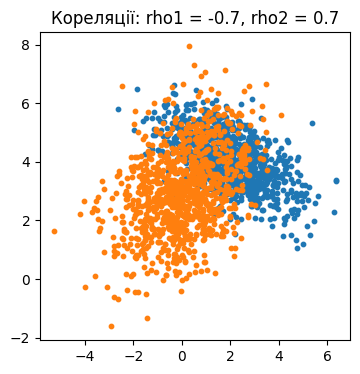

In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

# Вхідні параметри для першого кластеру
rho1 = -0.7  # Змінений знак коефіцієнта кореляції
sigma_x1_squared = 1.9
mu_x1 = [2, 4]
sigma_y1_squared = 0.8
mu_y1 = [2, 4]

# Вхідні параметри для другого кластеру (за замовчуванням)
rho2 = 0.7
sigma_x2_squared = 2.0
mu_x2 = [0, 3]
sigma_y2_squared = 2.0
mu_y2 = [0, 3]

# моделювання навчальної вибірки для кожного кластеру
N = 1000
x1 = np.random.multivariate_normal(mu_x1, [[sigma_x1_squared, rho1], [rho1, sigma_y1_squared]], N).T
x2 = np.random.multivariate_normal(mu_x2, [[sigma_x2_squared, rho2], [rho2, sigma_y2_squared]], N).T

# обчислення оцінок середнього та коваріаційних матриць для кожного кластеру
mm1 = np.mean(x1.T, axis=0)
mm2 = np.mean(x2.T, axis=0)

a = (x1.T - mm1).T
VV1 = np.array([[np.dot(a[0], a[0]) / N, np.dot(a[0], a[1]) / N],
                [np.dot(a[1], a[0]) / N, np.dot(a[1], a[1]) / N]])

a = (x2.T - mm2).T
VV2 = np.array([[np.dot(a[0], a[0]) / N, np.dot(a[0], a[1]) / N],
                [np.dot(a[1], a[0]) / N, np.dot(a[1], a[1]) / N]])

# модель гауссівського баєсівського класифікатора
Py1, L1 = 0.5, 1  # ймовірності появи класів
Py2, L2 = 1 - Py1, 1  # та величини штрафів невірної класифікації

b = lambda x, v, m, l, py: np.log(l * py) - 0.5 * (x - m) @ np.linalg.inv(v) @ (x - m).T - 0.5 * np.log(
    np.linalg.det(v))

x = np.array([0, -4])  # вхідний вектор у форматі (x, y)
a = np.argmax([b(x, VV1, mm1, L1, Py1), b(x, VV2, mm2, L2, Py2)])  # класифікатор
print(a)

# виведення графіків
plt.figure(figsize=(4, 4))
plt.title(f"Кореляції: rho1 = {rho1}, rho2 = {rho2}")
plt.scatter(x1[0], x1[1], s=10)
plt.scatter(x2[0], x2[1], s=10)
plt.show()

#### 2.2.Модифікувати код на випадок трьох кластерів. Змоделювати відповідні дані і візуалізувати результати. Продемонструвати працездатність класифікатора.

Cluster: 2


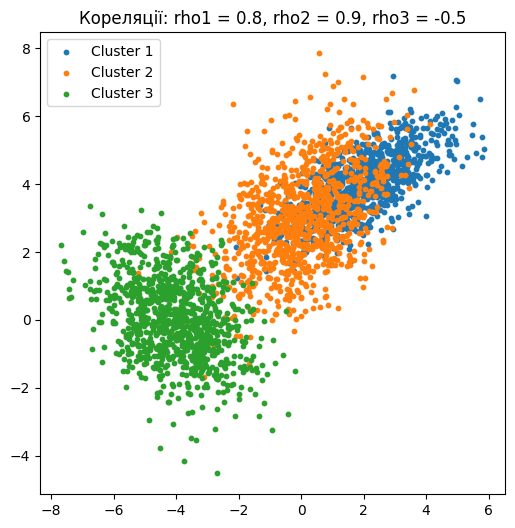

In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

# Вхідні параметри для першого кластеру
rho1 = 0.8
sigma_x1_squared = 1.7
mu_x1 = [2, 4]
sigma_y1_squared = 0.8
mu_y1 = [2, 4]

# Вхідні параметри для другого кластеру
rho2 = 0.9
sigma_x2_squared = 2.0
mu_x2 = [0, 3]
sigma_y2_squared = 2.0
mu_y2 = [0, 3]

# Вхідні параметри для третього кластеру
rho3 = -0.5
sigma_x3_squared = 1.4
mu_x3 = [-4, 0]
sigma_y3_squared = 1.4
mu_y3 = [-3, 0]

# моделювання навчальної вибірки для кожного кластеру
N = 1000
x1 = np.random.multivariate_normal(mu_x1, [[sigma_x1_squared, rho1], [rho1, sigma_y1_squared]], N).T
x2 = np.random.multivariate_normal(mu_x2, [[sigma_x2_squared, rho2], [rho2, sigma_y2_squared]], N).T
x3 = np.random.multivariate_normal(mu_x3, [[sigma_x3_squared, rho3], [rho3, sigma_y3_squared]], N).T

# обчислення оцінок середнього та коваріаційних матриць для кожного кластеру
mm1 = np.mean(x1.T, axis=0)
mm2 = np.mean(x2.T, axis=0)
mm3 = np.mean(x3.T, axis=0)

a = (x1.T - mm1).T
VV1 = np.array([[np.dot(a[0], a[0]) / N, np.dot(a[0], a[1]) / N],
                [np.dot(a[1], a[0]) / N, np.dot(a[1], a[1]) / N]])

a = (x2.T - mm2).T
VV2 = np.array([[np.dot(a[0], a[0]) / N, np.dot(a[0], a[1]) / N],
                [np.dot(a[1], a[0]) / N, np.dot(a[1], a[1]) / N]])

a = (x3.T - mm3).T
VV3 = np.array([[np.dot(a[0], a[0]) / N, np.dot(a[0], a[1]) / N],
                [np.dot(a[1], a[0]) / N, np.dot(a[1], a[1]) / N]])

# модель гауссівського баєсівського класифікатора
Py1, L1 = 1/3, 1  # ймовірності появи класів
Py2, L2 = 1/3, 1  
Py3, L3 = 1/3, 1  

b = lambda x, v, m, l, py: np.log(l * py) - 0.5 * (x - m) @ np.linalg.inv(v) @ (x - m).T - 0.5 * np.log(
    np.linalg.det(v))

x = np.array([0, -4])  # вхідний вектор у форматі (x, y)
a = np.argmax([b(x, VV1, mm1, L1, Py1), b(x, VV2, mm2, L2, Py2), b(x, VV3, mm3, L3, Py3)])  # класифікатор
print("Cluster:", a)

# виведення графіків
plt.figure(figsize=(6, 6))
plt.title(f"Кореляції: rho1 = {rho1}, rho2 = {rho2}, rho3 = {rho3}")
plt.scatter(x1[0], x1[1], s=10, label='Cluster 1')
plt.scatter(x2[0], x2[1], s=10, label='Cluster 2')
plt.scatter(x3[0], x3[1], s=10, label='Cluster 3')
plt.legend()
plt.show()

<h2 align="center">Відповіді на контрольні запитання</h2>

#### 1.Яка суть проблеми ймовірнісного погляду на машинне навчання в контексті логістичної регресії?

_Проблема ймовірнісного погляду на машинне навчання в контексті логістичної регресії полягає в тому, що ми намагаємося прогнозувати ймовірність того, що певний випадок належить до певного класу. Логістична регресія використовує логістичну функцію (також відому як сигмоїду) для визначення ймовірності, що дозволяє нам вирішувати задачі класифікації._

#### 2.Як працює метод максимальної правдоподібності в логістичній регресії?

_Метод максимальної правдоподібності в логістичній регресії використовується для оцінки параметрів моделі. Цей метод полягає в максимізації ймовірності спостережених даних, враховуючи параметри моделі. У логістичній регресії ми максимізуємо логарифмічну функцію правдоподібності._

#### 3.Чим відрізняється багатокласова логістична регресія від бінарної?

_Багатокласова логістична регресія відрізняється від бінарної тим, що вона призначена для ситуацій, де потрібно класифікувати дані на більш ніж два класи. У бінарній логістичній регресії ми маємо два класи (позитивний і негативний), тоді як у багатокласовій є більше двох класів._

#### 4.Що таке L2-регуляризатор і в чому сенс його використання для регуляризації моделей?

_L2-регуляризатор (також відомий як регуляризація Ridge) є методом регуляризації, який додає квадратичну штрафну функцію на коефіцієнти моделі до функції втрат. Це допомагає уникнути перенавчання та забезпечити кращу генералізацію моделі._

#### 5.Що таке L1-регуляризатор і в чому його принципова відмінність від L2-регуляризатора?

_L1-регуляризатор (або регуляризація Lasso) також додає штрафну функцію до функції втрат, але використовує абсолютне значення коефіцієнтів, а не їх квадратичні значення. Це може призвести до розріджених моделей, де деякі коефіцієнти будуть точно рівні нулю, що робить їх відмінними від L2-регуляризатора._

#### 6.В яких випадках доцільно використовувати лінійний дискримінант Фішера?

_Лінійний дискримінант Фішера використовується в задачах класифікації, особливо коли класи мають нормальний розподіл із рівними коваріаційними матрицями. Він шукає лінійну комбінацію змінних, яка найкраще розділяє класи. Він особливо ефективний у випадках, коли кількість зразків у кожному класі значно перевищує кількість змінних._


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3b771292-09f5-4cd0-adfb-1b3b61d985cf' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>